# Методи розв'язання нелінійних систем

## Завдання 1 (проста ітерація)

\begin{equation}
\begin{cases}  
&\cos(y)+x=1.5\\
&2y-\sin(x-0.5) = 1
\end{cases}
\end{equation}

### Визначаю початкове наближення за допомогою графіку. 

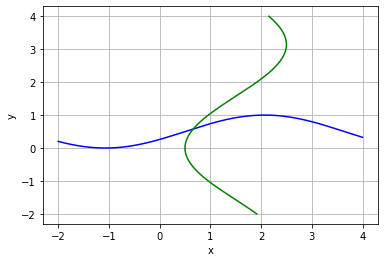

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 2y - sin(x-0.5) = 1
xl = np.linspace(-2, 4, 1000)
yl = 0.5*np.sin(xl-0.5)+0.5
plt.plot(xl, yl, 'b')

# cos(y) + x = 1.5
yu = np.linspace(-2, 4, 1000)
xu = 1.5-np.cos(yu)
plt.plot(xu, yu, 'g')


plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


Отже, тоді початкове наближення можно взяти за $(x, y) = (0.5, 0.5)$

### Перевірю достатні умови збіжності

Перше за все перепишу систему (1) в вигляді для простої ітерації

\begin{equation*}
\begin{cases}  
&x=1.5-\cos(y) = \varphi_1(x, y)\\
&y = 0.5+0.5\sin(x-0.5) = \varphi_2(x, y)
\end{cases}
\end{equation*}

Знайду матрицю Якобі для функції $\Phi(x, y) = \begin{pmatrix}\varphi_1(x, y)\\ \varphi_2(x, y)\end{pmatrix}$.

\begin{equation*}
J(x, y) = \begin{pmatrix} \frac{\partial\varphi_1}{\partial x}(x, y) & \frac{\partial\varphi_1}{\partial y}(x, y) \\ \frac{\partial\varphi_2}{\partial x}(x, y) & \frac{\partial\varphi_2}{\partial y}(x, y)\end{pmatrix} = \begin{pmatrix} 0 & \sin(y) \\ 0.5\cos(x-0.5) & 0\end{pmatrix}
\end{equation*}

Тут як, легко бачити $\forall (x, y) \in [-100, 100] \times [-\frac{\pi}{2}+\varepsilon, \frac{\pi}{2}-\varepsilon]\; \forall \varepsilon \in (0, \frac{\pi}{2})$, що $\left(|\sin(y)|<1\right) \wedge \left(|0.5\cos(x-0.5)|<1\right)$. Отже послідовність буде збіжної на $[-100, 100] \times [-\frac{\pi}{2}+\varepsilon, \frac{\pi}{2}-\varepsilon]\; \forall \varepsilon \in (0, \frac{\pi}{2})$, хоча мені здається, що може взагалі всюди, але перевіряти я це не буду.

### Реалізація методу простих ітерацій 

In [2]:
from collections.abc import Sequence
from typing import Callable


def simple_iterations(
    Φ: Sequence[Callable[[Sequence[float]], float]],
    x_init: Sequence[float],
    ε: float = 10**-5,
    table: int = 0,
) -> list[float]:
    norm: Callable[[Sequence[float], Sequence[float]], float] =\
        lambda x, y: max(map(lambda a: abs(a[0]-a[1]), zip(x, y)))

    if len(Φ) != len(x_init):
        raise ValueError("Wrong number of equations!")
    x: list[float] = [f(x_init) for f in Φ]
    y: list[float] = list(x_init)

    j: int = 2
    if table >= 1:
        print('0.', y, '-')
    if table >= 2:
        print('1.', x, norm(x, y))

    while norm(x, y) > ε:
        for i in range(len(x)):
            y[i] = x[i]
        for i, f in enumerate(Φ):
            x[i] = f(y)
        j += 1
        if table >= j:
            print(f'{j-1}.', x, norm(x, y))
    return x


Перевірка реалізації

In [3]:
ψ1: Callable[[Sequence[float]], float] = lambda X: 1.5 - np.cos(X[1])
ψ2: Callable[[Sequence[float]], float] = lambda X: 0.5 + 0.5*np.sin(X[0]-0.5)
Φ = (ψ1, ψ2)
x_init = [0.5, 0.5]
simple_iterations(Φ, x_init)

[0.6645900171692727, 0.581923951303976]

### Результати роботи програми у вигляді таблиці

In [4]:
answer = simple_iterations(Φ, x_init, table=30)

0. [0.5, 0.5] -
1. [0.6224174381096272, 0.5] 0.12241743810962724
2. [0.6224174381096272, 0.5610559542919131] 0.06105595429191313
3. [0.653306269589244, 0.5610559542919131] 0.03088883147961674
4. [0.653306269589244, 0.5763532267392986] 0.015297272447385435
5. [0.6615443975090917, 0.5763532267392986] 0.008238127919847682
6. [0.6615443975090917, 0.5804213436827695] 0.0040681169434709785
7. [0.6637683307505694, 0.5804213436827695] 0.002223933241477738
8. [0.6637683307505694, 0.5815186327780892] 0.0010972890953196979
9. [0.6643705614224403, 0.5815186327780892] 0.0006022306718709292
10. [0.6643705614224403, 0.5818157043636036] 0.00029707158551439683
11. [0.6645337778087275, 0.5818157043636036] 0.00016321638628713497
12. [0.6645337778087275, 0.5818962115144002] 8.050715079654935e-05
13. [0.6645780225608566, 0.5818962115144002] 4.4244752129163345e-05
14. [0.6645780225608566, 0.5819180350437645] 2.1823529364306538e-05
15. [0.6645900171692727, 0.5819180350437645] 1.199460841605493e-05
16. [0.664

### Перевірка підстановкою

Тобто підставлю в $F$, де 
$$F(x, y) =\begin{pmatrix}  
\cos(y)+x-1.5\\
2y-\sin(x-0.5) - 1
\end{pmatrix}$$ 
і буду сподіватися що $F(x^*, y^*)\approx 0$.

In [5]:
def f1(x, y): return np.cos(y)+x-1.5
def f2(x, y): return 2*y-np.sin(x-0.5)-1

f1(*answer), f2(*answer)

(-3.251752701771693e-06, 0.0)

Вийшов достатньо гарний результат.

### Інше початкове наближення

Наприклад $(x, y) = (-1, -5)$ та $(x, y) = (5, 10)$.

In [6]:
answer_1 = simple_iterations(Φ, (-1, -5), table=30)

0. [-1, -5] -
1. [1.2163378145367738, 0.0012525066979727772] 5.0012525066979725
2. [0.5000007843864117, 0.8283135022078604] 0.8270609955098875
3. [0.8238806806563969, 0.5000003921932058] 0.3283131100146546
4. [0.6224176261371337, 0.6591239311311673] 0.20146305451926316
5. [0.7094709391425535, 0.5610560476020982] 0.09806788352906914
6. [0.6533063192377835, 0.6039712164106806] 0.05616461990477006
7. [0.6769132046468471, 0.5763532512724191] 0.027617965138261535
8. [0.6615444108789045, 0.5879959005929615] 0.015368793767942646
9. [0.6679459875506129, 0.5804213502806388] 0.007574550312322681
10. [0.6637683343686847, 0.5835787951110293] 0.004177653181928198
11. [0.6655039678907189, 0.5815186345629415] 0.002060160548087775
12. [0.6643705624028482, 0.582374716644323] 0.0011334054878706645
13. [0.6648411089479179, 0.5818157048472004] 0.0005590117971226993
14. [0.6645337780744841, 0.5820477979337396] 0.0003073308734338198
15. [0.6646613454284347, 0.5818962116454839] 0.00015158628825573395
16. [0.

In [7]:
answer_2 = simple_iterations(Φ, (5, 10), table=30)

0. [5, 10] -
1. [2.3390715290764525, 0.011234941167451495] 9.988765058832549
2. [0.5000631112876678, 0.9821147601687327] 1.8390084177887847
3. [0.9447350002446409, 0.500031555643813] 0.4820832045249197
4. [0.622432567128086, 0.7151093367918848] 0.3223024331165548
5. [0.7449784464067437, 0.5610634621839267] 0.15404587460795816
6. [0.6533102644165264, 0.6212677073934639] 0.09166818199021731
7. [0.6868587796936861, 0.5763552007258479] 0.04491250666761604
8. [0.6615454732739972, 0.592886638322778] 0.025313306419688986
9. [0.6706687936987985, 0.580421874561976] 0.012464763760801967
10. [0.6637686218722763, 0.5849207320316179] 0.00690017182652225
11. [0.6662441450091069, 0.5815187763913221] 0.003401955640295773
12. [0.6643706403082763, 0.5827397255123776] 0.001873504700830586
13. [0.6650419226499795, 0.5818157432748918] 0.0009239822374857987
14. [0.6645337991921075, 0.582146842058788] 0.0005081234578719895
15. [0.6647157976162955, 0.581896222061697] 0.0002506199970909728
16. [0.6645780283577

Як бачимо, взявши дещо дальшу точку від корня маємо ітераційний проект, що збігається довше.

### Розв'язання з використанням fsolve

In [8]:
from scipy.optimize import fsolve


fsolve(lambda X: (f1(*X), f2(*X)), (0.5, 0.5))


array([0.66459448, 0.58192615])

## Завдання 2 (метод Ньютона)

\begin{equation*}
\begin{cases}  
&\sin(x+y) = 1.2x-0.1\\
&x^2+y^2=1
\end{cases}
\end{equation*}

### Визначаю початкове наближення за допомогою графіку. 

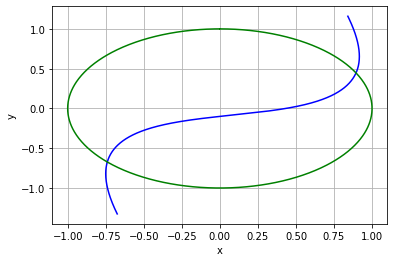

In [17]:
# sin(x+y) = 1.2x-0.1
u = np.linspace(-2, 2, 1000)
v = (np.sin(u)+0.1)/0.6 - u
plt.plot((u+v)/2, (u-v)/2, 'b')
# Параметризував x = 0.5(u+v), y = 0.5(u-v) =>
#  v = (sin(u) + 0.1)/0.6 - u


# x^2 + y^2 = 1
t = np.linspace(0, 6.28, 1000)
plt.plot(np.sin(t), np.cos(t), 'g')


plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


Тут наближено можна побачити 2 корені $(x, y) = (0.8, 0.4), (x, y) = (-0.75, -0.6)$.

### Реалізація спрощеного методу Ньютона

Спочатку знайду матрицю Якобі в загальному виді.
\begin{equation*}
\begin{aligned}  
&f_1(x, y) = \sin(x+y) - 1.2x+0.1,\\
&f_2(x, y) = x^2+y^2-1.
\end{aligned}
\end{equation*}

Тоді 
\begin{equation*}
W(x, y) = \begin{pmatrix} \frac{\partial f_1}{\partial x}(x, y) & \frac{\partial f_1}{\partial y}(x, y) \\ \frac{\partial f_2}{\partial x}(x, y) & \frac{\partial f_2}{\partial y}(x, y)\end{pmatrix} =
\begin{pmatrix}
\cos(x+y)-1.2 & \cos(x+y)\\
2x & 2y
\end{pmatrix}
\end{equation*}

Тут при реалізації спрощеного метода Ньютона знайду $W^{-1}$, бо не бачу сенсу на кожній ітерації розв'язувати СЛАР.

In [10]:
def simple_Newton(
        x_init: Sequence[float],
        W: Callable[[np.ndarray], np.ndarray],
        F: Callable[[np.ndarray], np.ndarray],
        ε: float = 10**-5,
        table: int = 0) -> np.ndarray:

    norm = lambda x, y: np.max(np.abs(x-y)) 
    y = np.array(x_init, dtype=float)
    W_ = np.linalg.inv(W(y))
    x = y - W_@F(y)
    if table >= 1:
        print('0.', y, '-')
    if table >= 2:
        print('1.', x, norm(x, y))
    j: int = 2
    while norm(x, y) > ε:
        np.copyto(y, x)
        x = y - W_@F(y)
        j += 1
        if table >= j:
            print(f'{j-1}.', x, norm(x, y))
    return x


Перевірка реалізації

In [11]:
def W(X: np.ndarray) -> np.ndarray:
    x, y, *_ = X
    return np.array((
        (np.cos(x+y)-1.2, np.cos(x+y)), (2*x, 2*y)
    ), dtype=np.float64)


def F(X: np.ndarray) -> np.ndarray:
    x, y, *_ = X
    return np.array(
        [np.sin(x+y)-1.2*x+0.1, x**2+y**2-1],
        dtype=np.float64)


simple_Newton([0.8, 0.4], W, F)


array([0.89480936, 0.44644809])

### Результати роботи програми у вигляді таблиці

In [12]:
solution = simple_Newton((0.8, 0.4), W, F, table=16)

0. [0.8 0.4] -
1. [0.90409173 0.44181654] 0.10409173194833898
2. [0.89398473 0.44630091] 0.010107006068406421
3. [0.89494223 0.4463944 ] 0.0009575080372904443
4. [0.89479687 0.44644818] 0.0001453651261761335
5. [0.89481132 0.4464475 ] 1.445498766128317e-05
6. [0.89480936 0.44644809] 1.9656990680738673e-06


### Перевірка підстановкою (**_F_**)

In [13]:
F(solution)

array([ 1.86341431e-07, -3.18518610e-07])

близько до $(0, 0)$.

### Інше початкове наближення

Наприклад $(x, y) = (-0.75, -0.6)$ та $(x, y) = (5, 10)$.

In [14]:
solution_1 = simple_Newton((-0.75, -0.6), W, F, table=16)

0. [-0.75 -0.6 ] -
1. [-0.74192473 -0.67467742] 0.07467742259270682
2. [-0.73937144 -0.67316743] 0.002553289513227419
3. [-0.73960232 -0.67302506] 0.00023088519934988394
4. [-0.73960172 -0.6730472 ] 2.21419980432902e-05
5. [-0.73960019 -0.67304641] 1.5281380131293432e-06


Як бачимо розв'язок збігається до іншого розв'язку.

In [15]:
solution_2 = simple_Newton((1, 10), W, F, table=16)
solution_2

0. [ 1. 10.] -
1. [-0.77432171  5.17743217] 4.822567829392065
2. [-0.71513398  3.8512445 ] 1.3261876718885555
3. [0.08792232 3.05376383] 0.8030562996811436
4. [0.08169808 2.63772606] 0.41603776928763425
5. [0.42482203 2.3052    ] 0.34312394760888515
6. [0.41584917 2.08137624] 0.22382375290913936
7. [0.58382177 1.8893261 ] 0.19205014019126154
8. [0.59931994 1.74225624] 0.14706986632599284
9. [0.68096908 1.61435927] 0.12789697322476123
10. [0.70704626 1.50825781] 0.10610145454320352
11. [0.74930935 1.4152937 ] 0.09296411120844028
12. [0.77380677 1.33461792] 0.08067577947218085
13. [0.79893361 1.26310614] 0.07151177916155915
14. [0.81795813 1.19951709] 0.06358905433950635
15. [0.83475704 1.14244236] 0.05707472836190797


array([0.89484344, 0.44658148])

Як бачимо в цьому випадку значно дольше, але все ж таки збігається до розв'язку (одного з розв'язків).

### Розв'язання з використанням fsolve

In [16]:
from scipy.optimize import fsolve


fsolve(F, (0.8, 0.4))


array([0.89480955, 0.44644807])

## Висновок

Отже, мною було реалізовні два методи розв'язання нелінійних систем рівнянь. Метод простої ітерації та спрощений метод Ньютона. При тестуванні методів було помічено, що чим ближче початкове наближення тим швидше метод збігається і збігається туди куди було заплановано, в другому методі (Ньютона) при різних початкових значеннях метод збігався до двох різних розв'язків.